Mike Hua

CYPLAN 255: Urban Informatics and Data Visualization

Final Project

Spring 2022

# Description

I'm hoping to use data from a crosswalk audit that Marcel Moran (Berkeley DCRP Ph.D Student) conducted in Sn Francisco and published in February. Marcel looked at all intersections in SF and recorded whether a crosswalk existed or not. I am looking at a few possibilites for data sets to analyze alongside this data, including census demographic data, open SF data, and traffic collision data from SafeTREC at UC Berkeley.

# Code

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
# import seaborn as sns
import numpy as np
%matplotlib inline
import geopandas as gpd
import json    
import requests
import pprint
pp = pprint.PrettyPrinter
from shapely.geometry import shape


In [8]:
cw_raw = pd.read_csv('data/moran_crosswalks_sf-1.csv')
cw = gpd.GeoDataFrame(cw_raw, geometry=gpd.points_from_xy(cw_raw.longitude, cw_raw.latitude))
cw.crs = 'epsg:4326'
cw.head()

,the_geom,cartodb_id,longitude,latitude,cw_q,geometry
0,0101000020E6100000883144A9189B5EC09FE2DD36F8E0...,1,-122.423380,37.757575,True,POINT (-122.42338 37.75757)
1,0101000020E6100000E8FE452BD29D5EC0B3BC619115E1...,2,-122.465953,37.758471,True,POINT (-122.46595 37.75847)
2,0101000020E61000004E2BE0F9A09C5EC0BBEB110FCDE2...,3,-122.447325,37.771883,True,POINT (-122.44733 37.77188)
3,0101000020E610000081D7C2876D9C5EC05435E61A0BE2...,4,-122.444185,37.765964,True,POINT (-122.44419 37.76596)
4,0101000020E610000088A29B583BA05EC0CE8360FA03E3...,5,-122.503622,37.773559,True,POINT (-122.50362 37.77356)


<AxesSubplot:>

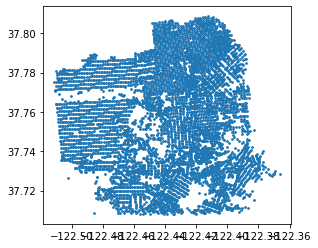

In [29]:
cw.plot(markersize=3)

In [27]:
cw.groupby(['cw_q']).count().geometry

cw_q
False    2700
True     3732
Name: geometry, dtype: int64

In [34]:
districts = gpd.read_file('https://data.sfgov.org/api/geospatial/keex-zmn4?method=export&format=Shapefile')
districts.head()


TypeError: 'CRS' object is not callable

In [33]:
dfsjoin = gpd.sjoin(districts, cw) #Spatial join Points to polygons
# dfpivot = pd.pivot_table(dfsjoin,index='PolyID',columns='Food',aggfunc={'Food':len})
# dfpivot.columns = dfpivot.columns.droplevel()

# dfpolynew = districts.merge(dfpivot, how='left', on='PolyID')

/var/folders/9k/gkg8xzc56_g6xv16y2x61y740000gn/T/ipykernel_25039/2083734282.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...
Right CRS: EPSG:4326

  dfsjoin = gpd.sjoin(districts, cw) #Spatial join Points to polygons


In [11]:
# API data

speed_limit = requests.get('https://data.sfgov.org/resource/3t7b-gebn.geojson')
print(speed_limit.text[:500])

{ "type": "FeatureCollection", "features": [{"type":"Feature","geometry":{"type":"MultiLineString","coordinates":[[[-122.412186,37.75583],[-122.41203,37.754227]]]},"properties":{"from_st":null,"schoolzone_limit":null,"mtab_motion":null,"workorder":null,"cnn":"0.0","st_type":null,"status":null,"mtab_date":null,"speedlimit":"15","street":null,"mtab_reso_text":null,"to_st":null,"schoolzone":"YES"}},{"type":"Feature","geometry":{"type":"MultiLineString","coordinates":[[[-122.395,37.787712],[-122.394


In [13]:
sl_geom = [shape(i) for i in speed_limit]
sl = gpd.GeoDataFrame({'geometry':sl_geom})

AttributeError: 'bytes' object has no attribute 'get'